In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import statsmodels.api as sm
from scipy import stats
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import random


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# plt.rcParams['figure.figsize'] = (10, 5)
# plt.style.use('fivethirtyeight')

# Code for data extraction
1. In this section we will load the raw data and extract utilization and frequency value

In [3]:
utilData = pd.read_csv('./Util_Run1.csv')
utilData.shape

(2674, 6)

In [4]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq
0,604872,4612865,165000000,0,31,600000
1,675,28712,275000000,0,4,200000
2,1191888,12624777,413000000,0,8,200000
3,773492,8196989,275000000,0,9,300000
4,1144,57890,206000000,0,7,300000


In [5]:
utilData['memLoad'] = utilData['memUse']*100/utilData['memTot']
utilData['memScore'] = utilData['memLoad']*utilData['memfreq']/825000000
utilData['memF'] = utilData['memfreq']*100/825000000

In [6]:
utilData['cpuScore'] = utilData['cpuload']*utilData['cpufreq']/1400000
utilData['cpuF'] = utilData['cpufreq']*100/1000000
utilData['memShift'] = utilData['memLoad'].shift()

In [7]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad,memScore,memF,cpuScore,cpuF,memShift
0,604872,4612865,165000000,0,31,600000,13.112718,2.622544,20.000000,13.285714,60.0,NaN
1,675,28712,275000000,0,4,200000,2.350933,0.783644,33.333333,0.571429,20.0,13.112718
2,1191888,12624777,413000000,0,8,200000,9.440864,4.726154,50.060606,1.142857,20.0,2.350933
3,773492,8196989,275000000,0,9,300000,9.436294,3.145431,33.333333,1.928571,30.0,9.440864
4,1144,57890,206000000,0,7,300000,1.976162,0.493442,24.969697,1.500000,30.0,9.436294


In [ ]:
tot_train = utilData.iloc[0:2136]


In [ ]:
train_1 = utilData.iloc[0:534]
train_2 = utilData.iloc[534:1068]
train_3 = utilData.iloc[1068:1602]
train_4 = utilData.iloc[1602:2136]
test_data = utilData.iloc[2136:]
print(train_1.tail())
test_data.shape

In [ ]:
# Sample Space to experiment

# Modeling 
In this section we will model the data and test its accuracy

In [ ]:
utilData['memShift'] = utilData['memLoad'].shift()

In [ ]:
model = ARIMA(tot_train[['cpuF']], order=(3,2,1), exog=tot_train[['memLoad','cpuScore']])
result = model.fit()
print(result.summary())

In [ ]:
model1 = ARIMA(train_1['cpuF'], order=(2,0,0))
result1 = model1.fit()
print(result1.summary())

In [ ]:
model2 = ARIMA(train_2['cpuF'], order=(2,0,1), exog=train_2['cpuScore'])
result2 = model2.fit()
print(result2.summary())

In [ ]:
model3 = ARIMA(train_3['cpuF'], order=(2,0,1), exog=train_3['cpuScore'])
result3 = model3.fit()
print(result3.summary())

In [ ]:
model4 = ARIMA(train_4['cpuF'], order=(4,0,1), exog=train_4['cpuScore'])
result4 = model4.fit()
print(result4.summary())

## Testing Accuracy
We will run both the models to test its accuracy

In [ ]:
# This is to test the accuracy of prediction
from sklearn import metrics

In [ ]:
forecast = result.forecast(steps=538,exog=test_data[['memScore','cpuScore']])
forecast = forecast.to_numpy()

In [ ]:
mtest_data = test_data.iloc[0:20]
pforecast = result.get_forecast(steps=20,exog=mtest_data[['memScore','cpuScore']])

In [ ]:
myDf = pforecast.summary_frame(alpha=0.05)
myDf['memScore'] = mtest_data['memScore'].values
myDf['cpuScore'] = mtest_data['cpuScore'].values
myDf['Actual freq'] = mtest_data['cpuF'].values
myDf


In [ ]:
mtest_data = test_data.iloc[300:320]
pforecast = result.get_forecast(steps=20,exog=mtest_data[['memScore','cpuScore']])
myDf = pforecast.summary_frame(alpha=0.05)
myDf['memScore'] = mtest_data['memScore'].values
myDf['cpuScore'] = mtest_data['cpuScore'].values
myDf['Actual freq'] = mtest_data['cpuF'].values
myDf

In [ ]:
forecast1 = result1.forecast(steps=538)
forecast1 = forecast1.to_numpy()

In [ ]:
forecast2 = result2.forecast(steps=538,exog=test_data['cpuScore'])
forecast2 = forecast2.to_numpy()

In [ ]:
forecast3 = result3.forecast(steps=538,exog=test_data['cpuScore'])
forecast3 = forecast3.to_numpy()

In [ ]:
forecast4 = result4.forecast(steps=538,exog=test_data['cpuScore'])
forecast4 = forecast4.to_numpy()

In [ ]:
y_true = test_data['cpuF'].to_numpy()

In [ ]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_true,forecast)))

In [ ]:
print('RMSE_1', np.sqrt(metrics.mean_squared_error(y_true,forecast1)))

In [ ]:
print('RMSE_2', np.sqrt(metrics.mean_squared_error(y_true,forecast2)))

In [ ]:
print('RMSE_3', np.sqrt(metrics.mean_squared_error(y_true,forecast3)))

In [ ]:
print('RMSE_4', np.sqrt(metrics.mean_squared_error(y_true,forecast4)))

# Splitting the time series
1. We will split the time series in fragments of 25 entries and then create 4 different entries and merge to train the data

In [ ]:
strain_1 = utilData.iloc[0:25]
strain_2 = utilData.iloc[25:50]
strain_3 = utilData.iloc[50:75]
strain_4 = utilData.iloc[75:100]
stest_data = utilData.iloc[2200:]
stest_data.shape

In [ ]:
strain_1.tail()

In [ ]:
# We create our data here
for i in range(100,2136,100):
    i_1,i_2,i_3,i_4 = i,i+25,i+50,i+75
    i_end = i+100
    strain_1 = strain_1.append(utilData.iloc[i_1:i_2],ignore_index=True)
    strain_2 = strain_2.append(utilData.iloc[i_2:i_3],ignore_index=True)
    strain_3 = strain_3.append(utilData.iloc[i_3:i_4],ignore_index=True)
    strain_4 = strain_4.append(utilData.iloc[i_4:i_end],ignore_index=True)

In [ ]:
strain_4.shape

## Modeling the split time series
We are using the newly generated split dataset to train and verify its acuracy

In [ ]:
smodel1 = ARIMA(strain_1['cpuScore'], order=(4,0,3), exog=strain_1['cpuF'])
sresult1 = smodel1.fit()
print(sresult1.summary())

In [ ]:
smodel2 = ARIMA(strain_2['cpuF'], order=(4,0,1))
sresult2 = smodel2.fit()
print(sresult2.summary())

In [ ]:
smodel3 = ARIMA(strain_3['cpuF'], order=(4,0,1), exog=strain_3['cpuScore'])
sresult3 = smodel3.fit()
print(sresult3.summary())

In [ ]:
smodel4 = ARIMA(strain_4['cpuF'], order=(4,0,1), exog=strain_4['cpuScore'])
sresult4 = smodel4.fit()
print(sresult4.summary())

## Prediction Phase for split
We are calculating the RMSE of the models

In [ ]:
sforecast1 = sresult1.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast1 = sforecast1.to_numpy()

In [ ]:
sy_true = stest_data['cpuF'].to_numpy()

In [ ]:
print('RMSE_1', np.sqrt(metrics.mean_squared_error(sy_true,sforecast1)))

In [ ]:
sforecast2 = sresult2.forecast(steps=474)
sforecast2 = sforecast2.to_numpy()

In [ ]:
print('RMSE_2', np.sqrt(metrics.mean_squared_error(sy_true,sforecast2)))

In [ ]:
sforecast3 = sresult3.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast3 = sforecast3.to_numpy()

In [ ]:
print('RMSE_3', np.sqrt(metrics.mean_squared_error(sy_true,sforecast3)))

In [ ]:
sforecast4 = sresult4.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast4 = sforecast4.to_numpy()

In [ ]:
print('RMSE_4', np.sqrt(metrics.mean_squared_error(sy_true,sforecast4)))

### Note; the results are better for smaller prediction interval. 
Does it mean we need to retrain every small interval. (We did 100 v. 474)
That is not an effective prediction model

# Grouping the data by a column
We will now model for each state of the cpufrequency

In [ ]:
#Get the unique cpuF values
cpuFArr = tot_train['cpuF'].unique()
cpuFArr

In [ ]:
sorted(utilData['memfreq'].unique())

In [ ]:
gtrain = tot_train.groupby(['cpuF'])

In [ ]:
gtrain.get_group(cpuFArr[0])

In [ ]:
mapTrain = {}
for  val in cpuFArr:
    mapTrain[val] = gtrain.get_group(val)

In [ ]:
gresult ={}
for val in cpuFArr:
    print("\n\nVal",val)
    gmodel = ARIMA(mapTrain[val]['cpuload'], order=(1,0,1))
    gresult[val] = gmodel.fit()
    print(gresult[val].summary())

### The results are very confusing
What should serve as the endogenous and exogenous variable for this model?

# Plotting the data
Understand how does the state looks like with the change


In [ ]:
utilData.plot(y='cpuload')

In [ ]:
utilData.plot(y='memLoad')

In [ ]:
x_axis= utilData.index.values.tolist()

In [ ]:
# plt.figure(figsize=(50,2))
fig, ax1 = plt.subplots(figsize=(50, 10))

x = utilData.index.values.tolist()
y1 = utilData['cpuF']
y2 = utilData['memF']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
plt.figure(figsize=(50,10))
fig, ax1 = plt.subplots(figsize=(50, 10))

x = utilData[1800:2000].index.values.tolist()
y1 = utilData['cpuScore'].iloc[1800:2000]
y2 = utilData['memScore'].iloc[1800:2000]

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
# plt.figure(figsize=(100,40))
fig, ax1 = plt.subplots(figsize=(100,10))

x = utilData.index.values.tolist()
y1 = utilData['cpuScore']
y2 = utilData['cpuF']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
plt.figure(figsize=(80,10))
fig, ax1 = plt.subplots(figsize=(80,10))

x = utilData.index.values.tolist()
y1 = utilData['memScore']
y2 = utilData['memF']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
plt.figure(figsize=(50,2))
fig, ax1 = plt.subplots(figsize=(50,10))

x = utilData.index.values.tolist()
y1 = utilData['cpuScore']
y2 = utilData['memF']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
# Empty space for plotting more

# Characterizing state and load behaviour
How does cpuload, memload, and their frequencies fare

In [ ]:
def diffCorr(x,y):
    print("Pearson",stats.pearsonr(x,y))
    print("Spearman",stats.spearmanr(x,y))

In [ ]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['memfreq'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['memLoad'].to_numpy()
x2 = utilData['cpuF'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['memScore'][0:500].to_numpy()
x2 = utilData['cpuScore'][0:500].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['memfreq'].to_numpy()
x2 = utilData['memLoad'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['memLoad'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['memfreq'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
diffCorr(x1,x2)

In [ ]:
x1 = utilData['memF'][500:1000].to_numpy()
x2 = utilData['cpuScore'][500:1000].to_numpy()
diffCorr(x1,x2)

### Note: Memory has more cross resource predictive power but cpu is better at its own prediction
We will utilize these values and try run a linear model to check how the coefficients look for a multi-dimensional ARMA model and a linear/other regression model

In [ ]:
#Empty space for code

# Plotting PACF and ACF
We need to find out the level of autocorrelation in the values

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
plot_pacf(tot_train['cpuScore'].diff().dropna(), lags=20, alpha=0.05,method='ols');

In [ ]:
plot_acf(tot_train['cpuload'].diff().dropna(), lags=20, alpha=0.05);

In [ ]:
plot_pacf(tot_train['memLoad'].diff().dropna(), lags=40, alpha=0.05,method='ols');

In [ ]:
plot_acf(tot_train['memF'].diff().dropna(), lags=50, alpha=0.05);

In [ ]:
# Space for futher analysis


# Understanding cross value lagged correlation
Using xcorr to get the idea of lagged dependency among variables

In [ ]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['memF'].to_numpy()
plt.xcorr(x1,x2,normed=True,maxlags=200);

In [ ]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
plt.xcorr(x1,x2,normed=True,maxlags=100);

In [ ]:
x1 = utilData['cpuScore'].diff().dropna().to_numpy()
x2 = utilData['memScore'].diff().dropna().to_numpy()
plt.xcorr(x1,x2,normed=True,usevlines=True,maxlags=200);

In [ ]:
x1 = utilData['memF'].to_numpy()
x2 = utilData['memScore'].to_numpy()
plt.xcorr(x1,x2,normed=True,maxlags=100);

In [ ]:
x1 = utilData['memF'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
plt.xcorr(x1,x2,normed=True,usevlines=True,maxlags=100);

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf
# fig, (ax1, ax2, ax3) = plt.subplots(3)
# plot_acf(utilData.cpuScore, ax=ax1,lags=50, alpha=0.05);
plot_acf(utilData.cpuload.diff().dropna(),lags=50, alpha=0.05);
# plot_acf(utilData.cpuload.diff().diff().dropna(),lags=50, alpha=0.05);


# Stationarity Check
We check whether a given variable is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(utilData['cpuload'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# Space for further checks

# Clustered Model approach

In [8]:
################################
## model
##
nr_sample = 2000
train = utilData.iloc[0:nr_sample]
test  = utilData.iloc[nr_sample:]

nr_chunk_sample = 50            # number of samples in a chunk
nr_chunk = int(nr_sample / nr_chunk_sample) # number of chunks
chunk_model = []                # which model chunk_model[i] belongs to

nr_model = 7                    # number of models
nr_model_switch_padding = 20    # number of padding samples between model switch
models = []

nr_kmean_epoch = 60             # number of epoch in k-mean
pr_kmean_update = 0.5           # learning rate of k-mean

#model_order = (2, 0, [2])
model_order = (3, 1, 1)
endog_key = 'cpuload'
exog_key = 'cpuF'


def diff(series):   # difference operation
    res = []
    for t in range(len(series)-1):
        if np.isnan(series[t]) or np.isnan(series[t+1]):
            res.append(0)
        else:
            res.append(series[t+1] - series[t])
    return res


def accu(series):   # accumulation operation
    res = []
    tsum = 0
    for t in (range(len(series))):
        tsum = tsum + series[t]
        res.append(tsum)
    return res


def get_sample(m):  # get sample for model m
    y, x = [], []
    for i in range(nr_chunk):
        # copy sample
        if chunk_model[i] != m:
            continue
        j = i + 1   # find the last contiguous mode
        while j < nr_chunk and chunk_model[j] == m:
            j = j + 1
        for k in range(i*nr_chunk_sample, j*nr_chunk_sample):
            y.append(train.loc[k, endog_key]) 
            x.append(train.loc[k, exog_key ])

        # padding
        if j + 1 >= nr_chunk:
            continue
        for k in range(nr_model_switch_padding):
            y.append(np.nan)
            x.append(np.nan)
            #x.append(x[-1]) # find a better value 
    return y, x


def fit_models():
    for m in range(nr_model):
        y, x = get_sample(m)
        y = diff(y) # length of y will by decreated by 1
        #x.pop()     # to mathch the length of x and y
        x = diff(x)
        if len(y) < nr_chunk_sample:
            continue
        #model = ARIMA(y, order=model_order).fit()
        model = ARIMA(y, order=model_order, exog=x).fit()
        models.append(model)
        print('mse', model.mse)


def init_chunks():
    for m in range(nr_chunk):
        chunk_model.append(random.randrange(nr_model))


def update_chunks():
    for c in range(nr_chunk):
        if random.random() > pr_kmean_update: # update slowly
            continue

        mses = []
        for m in range(nr_model):
            start, end = c*nr_chunk_sample, (c+1)*nr_chunk_sample
            y = list(train[endog_key][start:end])
            x = list(train[exog_key ][start:end])
            y = diff(y) # length of y will by decreated by 1
            #x.pop()     # to mathch the length of x and y
            x = diff(x)
            #res = models[m].apply(y, refit=False)
            res = models[m].apply(y, exog=x, refit=False)
            mses.append(res.mse)
        best = np.argmin(mses)
        chunk_model[c] = best


def estimate_models():
    # k-mean
    random.seed(1)
    init_chunks()
    for i in range(nr_kmean_epoch):
        print('[', i, '/', nr_kmean_epoch, ']--------------')
        fit_models()
        update_chunks()

def summary_models():
    for i in range(nr_model):
        print("Model Num: ", i)
        print(models[i].summary())



In [9]:
# estimate_models()


In [10]:
# summary_models()

# CPU Load prediction: Clustered approach

## 1. Fuzzy C mean clustering

In [ ]:
import skfda
from skfda.ml.clustering import FuzzyCMeans, KMeans

In [ ]:
N_Cluster = 2

In [ ]:
dy = utilData.cpuload.diff().dropna().to_numpy()
dz = utilData.memLoad.diff().dropna().to_numpy()
dx = utilData.cpuScore.diff().dropna().to_numpy()

In [ ]:
dz.shape,dx.shape

In [ ]:
min(dz)

In [ ]:
grid_point = [0,1,2]

In [ ]:
data_matrix = []
for v in zip(dy,dz,dx):
    data_matrix.append([round(v[0],2),round(v[0],2)])

In [ ]:
# data_matrix
data_matrix1 = []
for v in zip(dy,dz,dx):
    data_matrix1.append([round(v[0],1),round(v[1],2),round(v[2],2)])

In [ ]:
# Test something

In [ ]:
np.array(data_matrix1)      

In [ ]:
fuzzy_kmeans = FuzzyCMeans(n_clusters=N_Cluster,n_init=5 ,random_state=0,fuzzifier=2,max_iter=400)

In [ ]:
fd = skfda.FDataGrid(data_matrix,grid_point)

In [ ]:
fuzzy_kmeans.fit(fd)

In [ ]:
fd1 = skfda.FDataGrid(data_matrix1,grid_point)

In [ ]:
#fuzzy_kmeans.fit(fd1)

In [ ]:
fuzzy_kmeans.cluster_centers_


In [ ]:
fuzzy_kmeans1 = FuzzyCMeans(n_clusters=N_Cluster,n_init=5 ,init=None,fuzzifier=2,max_iter=400,random_state=0)

In [ ]:
fuzzy_kmeans1.fit(fd1)

In [ ]:
fuzzy_kmeans1.cluster_centers_.data_matrix

In [ ]:
fuzzy_kmeans.labels_

In [ ]:
mem = fuzzy_kmeans.predict(fd)
mem

In [ ]:
# utilData.iloc[201:221].cpufreq
fd[0]

In [ ]:
prob_count=fuzzy_kmeans.predict_proba(fd) 

In [ ]:
prob_count

### Getting Conditional Probability

In [ ]:
# Calculate transition
Count = [0 for _ in range(N_Cluster)]
TP_count = [[0 for _ in range(N_Cluster)] for _ in range(N_Cluster)]
for i in range(len(mem)):
    Count[mem[i]] += 1
    if i>0:
        TP_count[mem[i-1]][mem[i]] += 1

TP_count

In [ ]:
Cond_Prob = [[0 for _ in range(N_Cluster)] for _ in range(N_Cluster)]
for i in range(N_Cluster):
    for j in range(N_Cluster):
        Cond_Prob[i][j] = round(TP_count[i][j]/Count[j],3)
Cond_Prob

In [ ]:
#Caclulate fuzzy transition
PCount = [0 for _ in range(N_Cluster)]
PTP_count = [[0 for _ in range(N_Cluster)] for _ in range(N_Cluster)]
for i in range(len(prob_count)):
    for c in range(N_Cluster):
        PCount[c] += prob_count[i][c]
        if i>0:
            for cn in range(N_Cluster):
                PTP_count[cn][c] += prob_count[i-1][cn]*prob_count[i][c]



In [ ]:
PCond_Prob = [[0 for _ in range(N_Cluster)] for _ in range(N_Cluster)]
for i in range(N_Cluster):
    for j in range(N_Cluster):
        PCond_Prob[i][j] = round(PTP_count[i][j]/PCount[j],3)
PCond_Prob

In [ ]:
mem = list(mem)

In [ ]:
for i in range(N_Cluster):
    print(i," --> ", mem.count(i))

In [ ]:
#Plot

fig, ax1 = plt.subplots(figsize=(200,10))

x = list(range(len(mem)))
y1 = mem
y2 = utilData['cpuF'].iloc[1:]
ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [ ]:
# test comment

# Complete Architecture



Implementing the complete steps for the analysis and desing of our model


In [11]:
# Get the clustering model
import skfda
from skfda.ml.clustering import FuzzyCMeans, KMeans
# Num_Cluster = 4
# # Data for clustering
# dCpu = utilData.cpuload.diff().dropna().to_numpy()
# dMem = utilData.memLoad.diff().dropna().to_numpy()
# DataGrid for clustering

def getFDataGrid(inp):
    inp = np.array(inp)
    n_dim = inp.ndim
    if n_dim == 1:
        grid_point = list(range(len(inp)))
        data_grid = []
        data_grid.append(inp)
        fd = skfda.FDataGrid(data_grid,grid_point)
        return fd
    elif n_dim == 2:
        grid_point = list(range(len(inp[0])))
        data_grid = []
        for i in range(len(inp)):
            data_grid.append(inp[i])
        
        fd = skfda.FDataGrid(data_grid,grid_point)
        return fd
    else:
        raise Exception("Cannot handle more than 2 dimension for now") 
        return None
    
def getClusterModel(data,n_cluster=5,init_cluster=None):    
    fD = getFDataGrid(data)
    if fD == None:
        print("No data to cluster")
        return None
    fuzzyModel = FuzzyCMeans(n_clusters=n_cluster,n_init=5 ,init=init_cluster,fuzzifier=2,max_iter=400,random_state=0)
    fuzzyModel.fit(fD)
    return fuzzyModel
    
def get_C_prediction(model,data):
    fd = getFDataGrid(data)
    return model.predict_proba(fd)
    
def get_CondProb(model,data):
    prob_count = get_C_prediction(model,data)
    n_cluster = prob_count.shape[1]
    
    PCount = [0 for _ in range(n_cluster)]
    PTP_count = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
    for i in range(len(prob_count)):
        for c in range(n_cluster):
            PCount[c] += prob_count[i][c]
            if i>0:
                for cn in range(n_cluster):
                    PTP_count[cn][c] += prob_count[i-1][cn]*prob_count[i][c]
    
    
    PCond_Prob = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
    for i in range(n_cluster):
        for j in range(n_cluster):
            PCond_Prob[i][j] = round(PTP_count[i][j]/PCount[j],3)
    return PCond_Prob

def getShifted_Dataset(endog,p=1,exog=None,weight=None , shiftedExog=None):
    # Currently accepting only one dimensional exog if any
    if p < 1:
        print('Error needs atleast 1')
        return None
    plen = p
    df_temp = pd.DataFrame()
    df_temp['endog'] = endog
    # Getting shifted dataset
    for i in range(1,p+1):
        df_temp['Shift_endog_%d' % i] = df_temp['endog'].shift(i)
    if exog is not None:
        df_temp['exog'] = exog
        plen += 1
    if shiftedExog is not None:
        for i in range(1,shiftedExog+1):
            df_temp['Shift_exog_%d' % i] = df_temp['exog'].shift(i)
    if weight is not None:
        df_temp['Weight'] = weight
    elif weight is None:
        df_temp['Weight'] = np.ones(endog.shape[0])
        
    df_train_2 = df_temp.dropna()
    X_train = df_train_2.iloc[:,1:plen+1].values.reshape(-1,plen)
    y_train = df_train_2.iloc[:,0].values.reshape(-1)
    sample_weight = df_train_2['Weight'].values
    X_last = df_train_2.iloc[-1,:plen].values.reshape(-1,plen)
    return [y_train,X_train,X_last[0],sample_weight]

def WeighedLearn(y,X,weight):
    import statsmodels.api as sm
    X_sm = sm.add_constant(X)
    model = sm.WLS(y,X_sm,weights=weight)
    result = model.fit()
    return result

def ARPredict(model,y_last,steps=1,exog=None):
    # Ensure that the exog and model have the same dimension. Currently we have only one dim of exog
    if exog is not None:
        #Update
        if len(exog) != steps:
            print("Input variable incorrect")
            return None
    # Assume exog is there
    Y_out = []
    if exog is not None:
        X_update = []        
        X_inp = y_last
        for i in range(steps):
            X_test = [1.0]
#             X_test.extend(X_inp)
            X_test.append(exog[i])
            y_pred = model.get_prediction(X_test).predicted_mean
            Y_out.extend(y_pred)
            X_inp = y_pred+X_inp[:-1]
            print(X_inp)
        # Predict the data
        return Y_out
    else:
        #No exog
        X_inp = y_last
        for i in range(steps):
            X_test = [1.0]
            X_test.extend(X_inp)
            y_pred = model.get_prediction(X_test).predicted_mean
            Y_out.extend(y_pred)
            X_i = list(y_pred)
            X_i.extend(X_inp[:-1])
            X_inp = X_i
#             print(X_inp)
        return Y_out

In [12]:
def getNewDataFrame(fileName):
    myDf = pd.read_csv(fileName)
#     myDf['memLoad'] = myDf['memUse']*100/myDf['memTot']
    myDf['mUtil'] = myDf['mUtil'].clip(upper=100)
    myDf['mScore'] = myDf['mUtil']*myDf['mFreq']/825000000
    myDf['memF'] = myDf['mFreq']*100/825000000
    myDf['bcScore'] = myDf['bUtil']*myDf['bFreq']/1400000
#     myDf['cpuF'] = myDf['cpufreq']*100/1000000
    return myDf

utilData = getNewDataFrame('./UtilTestFinal')

In [13]:
#Testing new modification 
# 1. Download the data
mEndog = utilData.bUtil.to_numpy()
mExog = utilData.mUtil.to_numpy()
mDexog = utilData.mUtil.diff().to_numpy()
print(mEndog.shape,mExog.shape,mDexog.shape)

(8560,) (8560,) (8560,)


In [14]:
tD = getShifted_Dataset(mEndog,5)

<Axes: >

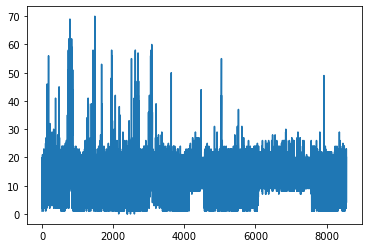

In [17]:
utilData.sUtil.plot()

In [ ]:
import statsmodels.api as sm
def WeighedLearn(y,X,weight):
#     import statsmodels.api as sm
    X_sm = sm.add_constant(X)
    model = sm.WLS(y,X_sm,weights=weight)
    result = model.fit()
    return result

model = WeighedLearn(tD[0],tD[1],weight=tD[3])

In [ ]:
X_test = sm.add_constant(tD[1])

In [ ]:
y_act = tD[0]
y_pred = model.get_prediction(X_test).predicted_mean
df_c = pd.DataFrame()
df_c['predict'] = y_pred
df_c['act'] = y_act

In [ ]:
df_c['res'] = df_c.act - df_c.predict
myAr = df_c['res'].values
# myAr.shape
plot_pacf(myAr, lags=30, alpha=0.05,method='ols');

In [ ]:
def MA(q,res):
    df_res = pd.DataFrame()
    df_res['res'] = res
#     print(df_res)
    for i in range(1,q+1):
        df_res['Shifted_%d' % i] = df_res['res'].shift(5+i)
    
#     print(df_res)
    my_data = df_res.dropna()
    my_train = pd.DataFrame(my_data[0:6000])
    my_test = pd.DataFrame(my_data[6000:])
#     print(my_train)
    X_train = my_train.iloc[:,1:].values.reshape(-1,q)
    X_sm = sm.add_constant(X_train)
#     print(X_train)
    Y_train = my_train.iloc[:,0].values.reshape(-1,1)
#     print(X_sm)
#     weight = np.ones(Y_train.shape[0])

    model = sm.OLS(Y_train,X_sm)
    result = model.fit()
    X_test = my_test.iloc[:,1:].values.reshape(-1,q)
    X_f = sm.add_constant(X_test)
    Y_f = my_test.iloc[:,0].values.reshape(-1)
    y_pred = result.get_prediction(X_f).predicted_mean
#     print(y_pred)
    df_plot = pd.DataFrame()
    df_plot['res'] = Y_f
    df_plot['pred'] = y_pred
    df_plot[['res','pred']].plot()
    return result

mymodel = MA(5,myAr)


# Get the 
mymodel.summary()    

In [ ]:
df_c[['res']].plot(kind='kde')

In [ ]:
df_plot = pd.DataFrame()
df_plot['Actual'] = y_act[2000:2200]
df_plot['Predicted'] = y_pred[2000:2200]
df_plot[['Actual','Predicted']].plot()

In [ ]:
import skfda
from skfda.ml.clustering import FuzzyCMeans, KMeans
class FuzzyCluster:
    def __init__(self,data,n_cluster=3,init_cluster=None,fuzzifier=2):
        self.data = data
        self.nclust = n_cluster
        self.init_clust = init_cluster
        self.model = None
        self.predictClus = None
        self.fData = None
        self.fuzzifier=fuzzifier
        self.probCond = None
    
    def getFDataGrid(self, inp):
        inp = np.array(inp)
        n_dim = inp.ndim
        if n_dim == 1:
            grid_point = list(range(len(inp)))
            data_grid = []
            data_grid.append(inp)
            fd = skfda.FDataGrid(data_grid,grid_point)
            return fd
        elif n_dim == 2:
            grid_point = list(range(len(inp[0])))
            data_grid = []
            for i in range(len(inp)):
                data_grid.append(inp[i])

            fd = skfda.FDataGrid(data_grid,grid_point)
            return fd
        else:
            raise Exception("Cannot handle more than 2 dimension for now") 
            return None
    
    def update_data(self,data):
        self.data.extend(data)
        return
        
        
    def fit(self):    
        self.fData = self.getFDataGrid(self.data)
        if self.fData == None:
            print("No data to cluster")
            return None
        self.model = FuzzyCMeans(n_clusters=self.nclust,n_init=5 ,init=self.init_clust,fuzzifier=self.fuzzifier,max_iter=400,random_state=0)
        self.model.fit(self.fData)
        self.predictClus = self.model.predict_proba(self.fData)
        return self.model,self.predictClus
    
    def predict_clust(self,data):
        fd = self.getFDataGrid(data)
        return self.model.predict_proba(fd)
    
    def get_center(self):
        return self.model.cluster_centers_.data_matrix
        
    def get_CondProb(self):
        prob_count = self.predictClus
        n_cluster = self.nclust

        PCount = [0 for _ in range(n_cluster)]
        PTP_count = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
        for i in range(len(prob_count)):
            for c in range(n_cluster):
                PCount[c] += prob_count[i][c]
                if i>0:
                    for cn in range(n_cluster):
                        PTP_count[cn][c] += prob_count[i-1][cn]*prob_count[i][c]


        self.probCond = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
        for i in range(n_cluster):
            for j in range(n_cluster):
                self.probCond[i][j] = round(PTP_count[i][j]/PCount[j],3)
        return self.probCond
    

        

In [ ]:
MyClust = FuzzyCluster(data_matrix,2)

In [ ]:
MyClust.fit()

In [ ]:
MyClust.predict_clust([-2,-2])

In [ ]:
MyClust.get_CondProb()

In [ ]:
dCpu = utilData.bUtil.diff().dropna().to_numpy()
dMem = utilData.memLoad.diff().dropna().to_numpy()
# Create a combined Data
dM = []
for v in zip(dCpu,dMem):
    dM.append([round(v[0],1),round(v[1],2)])
myModel = getClusterModel(dM)
# get_C_prediction(myModel,dM)[:,0]
dCpu[-5:]

In [ ]:
Out = getShifted_Dataset(dCpu,5)
Model = WeighedLearn(Out[0],Out[1],weight=Out[3])
ARPredict(Model,Out[2],5)
# Model.summary()
print(Out[2])

In [ ]:
dCpu[-1:-6:-1]

In [ ]:
model_verify = ARIMA(mEndog[:2500], order=(5,0,0),exog=dMem[:2500])

In [ ]:
Model.summary()

In [ ]:
result_verify = model_verify.fit()
print(result_verify.summary())

In [ ]:
result_verify.forecast(steps=4,exog=dMem[2500:2504])

In [ ]:
class ARMA:
    def __init__(self,endog,p=3,q=2,exog=None,weight=None):
        self.endog = endog
        self.p = p
        self.q = q
        self.exog = exog
        self.w = weight
        self.model = None
        self.MAmodel = None
        self.xData = None
        self.yData = None
        self.ylast = None
        self.fitData = None
        self.residual = None
        self.reslast = None
        
    def getShifted_Dataset(self):
        # Currently accepting only one dimensional exog if any
        if self.p < 1:
            print('Error needs atleast 1')
            return None
        plen = self.p
        df_temp = pd.DataFrame()
        df_temp['endog'] = self.endog
        # Getting shifted dataset
        for i in range(1,self.p+1):
            df_temp['Shift_endog_%d' % i] = df_temp['endog'].shift(i)
        if self.exog is not None:
            # We are assuming that the xvalues are 2D value
            self.exog = np.array(self.exog)
            for xid in range(self.exog.shape[0]):
                df_temp['exog_%d' % xid] = self.exog[xid]
                plen += 1
        if self.w is not None:
            df_temp['Weight'] = self.w
        elif self.w is None:
            df_temp['Weight'] = np.ones(self.endog.shape[0])

        df_train_2 = df_temp.dropna()
        X_train = df_train_2.iloc[:,1:plen+1].values.reshape(-1,plen)
        y_train = df_train_2.iloc[:,0].values.reshape(-1,1)
        sample_weight = df_train_2['Weight'].values
        X_last = df_train_2.iloc[-1,:self.p].values.reshape(-1,self.p)
        return [y_train,X_train,X_last[0],sample_weight]
    
    def update_data(self,endog,exog=None,weight=None):
        # Addpending the data
        self.endog.extend(endog)
        if exog is not None:
            self.exog.extend(exog)
        if weight is not None:
            self.w.exend(weight)
        # This part is helps adding the new observed data and can be used to retrain the model
        self.ylast = self.endog[-1:-(self.p+1):-1]
        return
    
    def WeighedLearn(self,y,X,weight):
        import statsmodels.api as sm
        X_sm = sm.add_constant(X)
        model = sm.WLS(y,X_sm,weights=weight)
        result = model.fit()
        return result
    
    def AR(self):
        tData = self.getShifted_Dataset()
#         self.yData = tData[0]
#         self.xData = tData[1]
        self.ylast = tData[2]
#         weight = tData[3]
        self.model = self.WeighedLearn(tData[0],tData[1],weight=tData[3])
        # Get the residuals:
        return self.model,self.ylast
    
    def MA(self):
        df_res = pd.DataFrame()
        df_res['res'] = res
        #     print(df_res)
        for i in range(1,q+1):
            df_res['Shifted_%d' % i] = df_res['res'].shift(i)

        #     print(df_res)
        my_data = df_res.dropna()
        my_train = pd.DataFrame(my_data[0:6000])
        my_test = pd.DataFrame(my_data[6000:])
        #     print(my_train)
        X_train = my_train.iloc[:,1:].values.reshape(-1,q)
        X_sm = sm.add_constant(X_train)
        #     print(X_train)
        Y_train = my_train.iloc[:,0].values.reshape(-1,1)
        #     print(X_sm)
        #     weight = np.ones(Y_train.shape[0])

        model = sm.OLS(Y_train,X_sm)
        result = model.fit()
        X_test = my_test.iloc[:,1:].values.reshape(-1,q)
        X_f = sm.add_constant(X_test)
        Y_f = my_test.iloc[:,0].values.reshape(-1)
        y_pred = result.get_prediction(X_f).predicted_mean
        #     print(y_pred)
        df_plot = pd.DataFrame()
        df_plot['res'] = Y_f
        df_plot['pred'] = y_pred
        df_plot[['res','pred']].plot()
        return result
           
    def get_predict(self,steps=1,exog=None):
        # Ensure that the exog and model have the same dimension. Currently we have only one dim of exog
        if exog is not None:
            #Update
            if len(exog) != steps:
                print("Exog variable incorrect")
                return None
        # Assume exog is there
        Y_out = []
#         print("exog",exog)
        if exog is not None:
            X_update = []        
            X_inp = self.ylast
#             print("ylast",self.ylast)
            for i in range(steps):
                X_test = [1.0]
                X_test.extend(X_inp)
                X_test.extend(exog[i])
#                 print("Xtest",X_test)
                y_pred = self.model.get_prediction(X_test).predicted_mean
                Y_out.extend(y_pred)
                X_i = list(y_pred)
                X_i.extend(X_inp[:-1])
                X_inp = X_i
#                 print(X_inp)
            # Predict the data
            return Y_out
        else:
            #No exog
            X_inp = self.ylast
            for i in range(steps):
                X_test = [1.0]
                X_test.extend(X_inp)
                y_pred = self.model.get_prediction(X_test).predicted_mean
                Y_out.extend(y_pred)
                X_i = list(y_pred)
                X_i.extend(X_inp[:-1])
                X_inp = X_i
    #             print(X_inp)
            return Y_out        

In [ ]:
weight = np.linspace(0.5,1.0,2500)
classTest = ARMA(mEndog[:2500],p=5,exog=[mExog[:2500],mDexog[:2500]],weight=weight)
classTest.AR()
# classTest.get_predict(steps=3,exog=dMem[2500:2503])

In [ ]:
mDexog[2500]

In [ ]:
classTest.get_predict(steps=1,exog=[[mExog[2500],mDexog[2500]]])

In [ ]:
len(dMem)

In [ ]:
X = [1,2,3]
Y = [4,5]
X.extend(Y)
print(X)

In [ ]:
import numpy as np
X = np.array([[1,2,3],[3,2,3]])


# Modular Code
Here we will use the classes to actually create the pipeline for our estimation

In [ ]:
import skfda
from skfda.ml.clustering import FuzzyCMeans, KMeans
class OSLFuzzyCluster:
    def __init__(self,data,n_cluster=3,init_cluster=None,fuzzifier=2):
        self.data = data
        self.nclust = n_cluster
        self.init_clust = init_cluster
        self.model = None
        self.predictClus = None
        self.fData = None
        self.fuzzifier=fuzzifier
        self.probCond = None
    
    def getFDataGrid(self, inp):
        inp = np.array(inp)
        n_dim = inp.ndim
        if n_dim == 1:
            grid_point = list(range(len(inp)))
            data_grid = []
            data_grid.append(inp)
            fd = skfda.FDataGrid(data_grid,grid_point)
            return fd
        elif n_dim == 2:
            grid_point = list(range(len(inp[0])))
            data_grid = []
            for i in range(len(inp)):
                data_grid.append(inp[i])

            fd = skfda.FDataGrid(data_grid,grid_point)
            return fd
        else:
            raise Exception("Cannot handle more than 2 dimension for now") 
            return None
    
    def update_data(self,data):
        self.data = np.append(self.data,np.array(data))
        return
        
        
    def fit(self):    
        self.fData = self.getFDataGrid(self.data)
        if self.fData == None:
            print("No data to cluster")
            return None
        self.model = FuzzyCMeans(n_clusters=self.nclust,n_init=5 ,init=self.init_clust,fuzzifier=self.fuzzifier,max_iter=400,random_state=0)
        self.model.fit(self.fData)
        self.predictClus = self.model.predict_proba(self.fData)
        return self.model,self.predictClus
    
    def predict_clust(self,data):
        fd = self.getFDataGrid(data)
        return self.model.predict_proba(fd)
    
    def get_center(self):
        return self.model.cluster_centers_.data_matrix
        
    def get_CondProb(self):
        prob_count = self.predictClus
        n_cluster = self.nclust

        PCount = [0 for _ in range(n_cluster)]
        PTP_count = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
        for i in range(len(prob_count)):
            for c in range(n_cluster):
                PCount[c] += prob_count[i][c]
                if i>0:
                    for cn in range(n_cluster):
                        PTP_count[cn][c] += prob_count[i-1][cn]*prob_count[i][c]


        self.probCond = [[0 for _ in range(n_cluster)] for _ in range(n_cluster)]
        for i in range(n_cluster):
            for j in range(n_cluster):
                self.probCond[i][j] = round(PTP_count[i][j]/PCount[i],3) # P(Y(t) in j / Y(t-1) in i)
        return self.probCond
    

        

In [ ]:
class OSLARMA:
    def __init__(self,endog,p=3,exog=None,weight=None):
        self.endog = endog
        self.p = p
        self.exog = exog
        self.w = weight
        self.model = None
        self.xData = None
        self.yData = None
        self.ylast = None
        self.fitData = None
    
    def summary(self):
        return self.model.summary()
        
    def getShifted_Dataset(self):
        # Currently accepting only one dimensional exog if any
        if self.p < 1:
            print('Error needs atleast 1')
            return None
        plen = self.p
        df_temp = pd.DataFrame()
        df_temp['endog'] = self.endog
        # Getting shifted dataset
        for i in range(1,self.p+1):
            df_temp['Shift_endog_%d' % i] = df_temp['endog'].shift(i)
        if self.exog is not None:
            df_temp['exog'] = self.exog
            plen += 1
        if self.w is not None:
            df_temp['Weight'] = self.w
        elif self.w is None:
            df_temp['Weight'] = np.ones(self.endog.shape[0])

        df_train_2 = df_temp.dropna()
        X_train = df_train_2.iloc[:,1:plen+1].values.reshape(-1,plen)
        y_train = df_train_2.iloc[:,0].values.reshape(-1,1)
        sample_weight = df_train_2['Weight'].values
        X_last = df_train_2.iloc[-1,:self.p].values.reshape(-1,self.p)
        return [y_train,X_train,X_last[0],sample_weight]
    
    def update_data(self,endog,exog=None,weight=None):
        # Addpending the data
        self.endog = np.concatenate((self.endog,np.array(endog)))
        
        if exog is not None:
            self.exog = np.concatenate((self.exog, np.array(exog)))
        if weight is not None:
            self.w = np.concatenate((self.w,np.array(weight)))
        # This part is helps adding the new observed data and can be used to retrain the model
        self.ylast = self.endog[-1:-(self.p+1):-1]
#         #Test Code
#         print("Update",self.ylast)
#         #End testcode
        return
    
    def WeighedLearn(self,y,X,weight):
        import statsmodels.api as sm
        X_sm = sm.add_constant(X)
        model = sm.WLS(y,X_sm,weights=weight)
        result = model.fit()
        return result
    
    def fit(self):
        tData = self.getShifted_Dataset()
#         self.yData = tData[0]
#         self.xData = tData[1]
        self.ylast = tData[2]
#         weight = tData[3]
        self.model = self.WeighedLearn(tData[0],tData[1],weight=tData[3])
        return self.model,self.ylast
           
    def get_predict(self,steps=1,exog=None):
        # Ensure that the exog and model have the same dimension. Currently we have only one dim of exog
        if exog is not None:
            #Update
            if len(exog) != steps:
                print("Exog variable incorrect")
                return None
        # Assume exog is there
        Y_out = []
#         print("exog",exog)
        if exog is not None:
            X_update = []        
            X_inp = self.ylast
#             print("ylast",self.ylast)
            for i in range(steps):
                X_test = [1.0]
                X_test.extend(X_inp)
                X_test.append(exog[i])
#                 print("Xtest",X_test)
                y_pred = self.model.get_prediction(X_test).predicted_mean
                Y_out.extend(y_pred)
                X_i = list(y_pred)
                X_i.extend(X_inp[:-1])
                X_inp = X_i
#                 print(X_inp)
            # Predict the data
            return Y_out
        else:
            #No exog
            X_inp = self.ylast
            for i in range(steps):
                X_test = [1.0]
                X_test.extend(X_inp)
                y_pred = self.model.get_prediction(X_test).predicted_mean
                Y_out.extend(y_pred)
                X_i = list(y_pred)
                X_i.extend(X_inp[:-1])
                X_inp = X_i
    #             print(X_inp)
            return Y_out        

In [ ]:
def getDataFrame(fileName):
    myDf = pd.read_csv(fileName)
    myDf['memLoad'] = myDf['memUse']*100/myDf['memTot']
    myDf['memScore'] = myDf['memLoad']*myDf['memfreq']/825000000
    myDf['memF'] = myDf['memfreq']*100/825000000
    myDf['cpuScore'] = myDf['cpuload']*myDf['cpufreq']/1400000
    myDf['cpuF'] = myDf['cpufreq']*100/1000000
    return myDf

In [ ]:
def getDataMatrix(dx,dy=None):
    data_matrix=[]
    if dy is None:
        for v in dx:
            data_matrix.append([round(v,2),round(v,2)])
    else:
        for v in zip(dx,dy):
            data_matrix.append([round(v[0],2),round(v[1],2)])
    return data_matrix


In [ ]:
# Testing without exog
def main():
    utilData = getDataFrame('./Util_Run1.csv')
#     dy = utilData.cpuload.diff().dropna().to_numpy()
    dy = utilData.memLoad.dropna().to_numpy()
    nCluster = 5
    y_train = dy[:2000]
    y_test = dy[2000:]
    y_dmat = getDataMatrix(y_train)
    myClust = OSLFuzzyCluster(y_dmat,n_cluster=nCluster)
    _, data_weight = myClust.fit()
#     print(dy[0])
#     print(data_weight)
#     print("data_cluster", myClust.get_center())
    trans_prob = myClust.get_CondProb()
    print(trans_prob)
    print("\n\n\n")
    # We will send the weights of the data and then train these models
    models = []
    # Train the models
    for i in range(nCluster):
        model = OSLARMA(y_train,p=5,weight=data_weight[:,i])
        model.fit()
#         print(model.summary())
        models.append(model)
    
    # Models are trained now begin prediction
#     print("last actual value", y_train[-1],"Likelihood cluster", myClust.predict_clust([ y_train[-1], y_train[-1]]))
    y_prior = y_train[-1]
    for i in range(100):
        # Get prob of P(Y(t-1) in i) using cluster
        P_prior = myClust.predict_clust([y_prior,y_prior])[0]
#         print("P",P_prior)
        P_like = []
        # Predict likelihood of Y(t) in cluster based on transition prob
        for k in range(nCluster):
            prob = 0
            for j in range(nCluster):
                prob += trans_prob[j][k]*P_prior[j]
            P_like.append(prob)
        
#         print("PLike",P_like)
        y_act = y_test[i]
        y_prior = y_act
        y_pred = []
        y_est = 0
        for j in range(nCluster):
            y_pred.append(models[j].get_predict()[0])
            y_est += y_pred[-1]*P_like[j]
        
        print(i, y_act,y_est)
        
        for j in range(nCluster):
            models[j].update_data([y_act])
            

main()
    

In [ ]:
import numpy as np

In [ ]:
a = np.array([1,2,3])
b= np.array([3,2,1])
c = b-a
c

In [ ]:
np.zeros(5)

In [ ]:
X = [[1,3,5],[2,4,6]]
X = np.array(X)

X.shape

In [ ]:
X = np.concatenate((X,np.array([[7,8]]).reshape(X.shape[0],1)),axis=1)
X.ndim

# Filtering Data
Here we will test low-pass and high-pass filters

<Axes: >

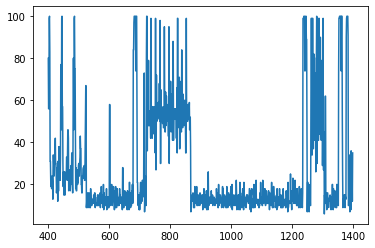

In [30]:
# Plot the data
# utilData['bUtil'].values.plot()
df_plot = pd.DataFrame()
df_plot['bUtil'] = utilData.bUtil.values
df_plot.iloc[400:1400,:].bUtil.plot()

In [22]:
from scipy.signal import butter,filtfilt

In [73]:
T = 500
fs = 2.0
cutoff = 0.5
nyq = 0.5*fs
order = 2
n = int(T*fs)
data = df_plot.iloc[400:1400,:].bUtil.values


In [74]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [75]:
y = butter_lowpass_filter(data, cutoff, fs, order)

<Axes: >

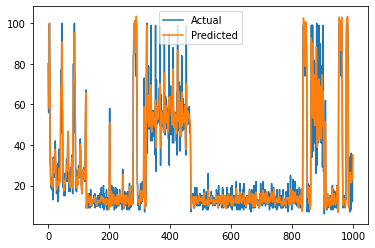

In [76]:
df_p = pd.DataFrame()
df_p['Actual'] = data
df_p['Predicted'] = y
df_p[['Actual','Predicted']].plot()

In [77]:
# Low 